<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
import keras
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

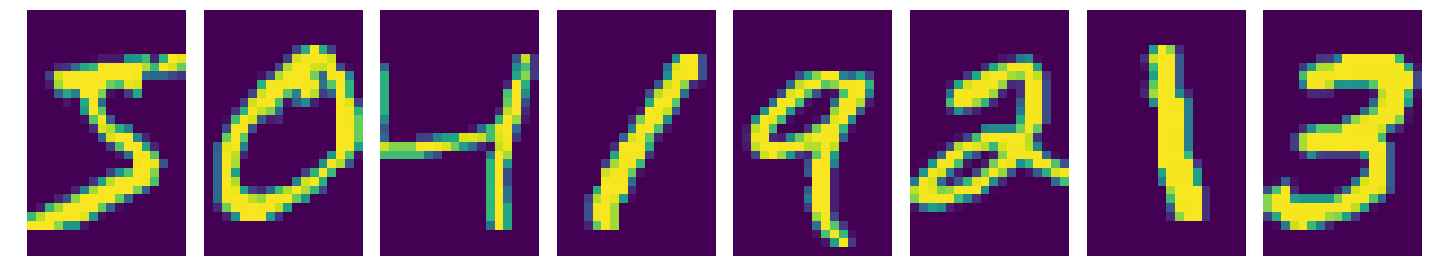

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(20, 4), sharey=True)
for idx, ax in enumerate(axs):
    ax.imshow(X_train[idx], aspect='equal')
    ax.set_axis_off()
plt.tight_layout()

In [52]:
#reshape data to fit model
X_train_reshaped = X_train.reshape(60000,28,28,1)
X_test_reshaped = X_test.reshape(10000,28,28,1)

In [53]:
from keras.utils import to_categorical
#one-hot encode target column
y_train_reshaped = to_categorical(y_train)
y_test_reshaped = to_categorical(y_test)
y_train_reshaped[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [57]:
y_train_reshaped

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [64]:
28 * 28

784

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train the model
model.fit(X_train_reshaped, y_train_reshaped, validation_data=(X_test_reshaped, y_test_reshaped), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 89s 1ms/step - loss: 1.1779 - acc: 0.8959 - val_loss: 0.0817 - val_acc: 0.9776
Epoch 2/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0625 - acc: 0.9803 - val_loss: 0.0691 - val_acc: 0.9804
Epoch 3/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0433 - acc: 0.9869 - val_loss: 0.1062 - val_acc: 0.9751
Epoch 4/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0354 - acc: 0.9892 - val_loss: 0.1016 - val_acc: 0.9752
Epoch 5/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0265 - acc: 0.9919 - val_loss: 0.0939 - val_acc: 0.9802


In [70]:
#predict first 4 images in the test set
model.predict(X_test_reshaped[:4])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [72]:
y_test_reshaped[:4]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])